**1. Consider the following dataset and calculate the entropy and information gain w.r.t the target attribute named “Status”.**

In [4]:
from math import log2

In [5]:
# calculate the entropy for a dataset
class0 = 5/10  #class0=rejected
class1 = 5/10  #class1=selected
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1))
# print the result
print(' dataset entropy: %.3f ' % entropy)

 dataset entropy: 1.000 


In [6]:
# calculate the entropy for the split in the dataset
def entropy(class0, class1):
	return -(class0 * log2(class0) + class1 * log2(class1))

In [7]:
# split 1 (Age group - old)
s1_class0 = 1
s1_class1 = 0
# calculate the entropy of the first group
s1_entropy = -(s1_class0 * log2(s1_class0) + 0)
print('Group1(Age group - old) Entropy: %.3f ' % s1_entropy)

Group1(Age group - old) Entropy: -0.000 


In [8]:
# split 1 (Age group - middle)
class0 = 2/4
class1 = 2/4
# calculate the entropy of the first group
s2_entropy = -(class0 * log2(class0) + class1 * log2(class1))
print('Group1(Age group - middle) Entropy: %.3f ' % s2_entropy)

Group1(Age group - middle) Entropy: 1.000 


In [9]:
# split 1 (Age group - young)
class0 = 0
class1 = 1
# calculate the entropy of the first group
s3_entropy = -(0 + class1 * log2(class1))
print('Group1(Age group - young) Entropy: %.3f ' % s3_entropy)

Group1(Age group - young) Entropy: -0.000 


In [10]:
# calculate the information gain
gain = 1 - ((3/10 * 0)+ (4/10 * 1)+ (3/10 * 0))
print('Information Gain (Age group): %.3f ' % gain)

Information Gain (Age group): 0.600 


In [11]:
# split 2 (Certified - yes)
s1_class0 = 3/4
s1_class1 = 1/4
# calculate the entropy of the first group
s1_entropy = -(s1_class0 * log2(s1_class0) + s1_class1 * log2(s1_class1))
print('Group1(Certified - yes) Entropy: %.3f ' % s1_entropy)

Group1(Certified - yes) Entropy: 0.811 


In [12]:
# split 2 (Certified - yes)
s1_class0 = 2/6
s1_class1 = 4/6
# calculate the entropy of the first group
s2_entropy = -(s1_class0 * log2(s1_class0) + s1_class1 * log2(s1_class1))
print('Group1(Certified - no) Entropy: %.3f ' % s2_entropy)

Group1(Certified - no) Entropy: 0.918 


In [13]:
# calculate the information gain
gain = 1 - (4/10 * 0.811 + 6/10 * 0.918)
print('Information Gain (Certified): %.3f ' % gain)

Information Gain (Certified): 0.125 


In [14]:
# split 3 (Skill Type - Soft skill)
s1_class0 = 3/6
s1_class1 = 3/6
# calculate the entropy of the first group
s1_entropy = -(s1_class0 * log2(s1_class0) + s1_class1 * log2(s1_class1))
print('Group1(Skill type - soft skill) Entropy: %.3f ' % s1_entropy)

Group1(Skill type - soft skill) Entropy: 1.000 


In [15]:
# split 3 (Skill Type - Hard skill)
s1_class0 = 2/4
s1_class1 = 2/4
# calculate the entropy of the first group
s1_entropy = -(s1_class0 * log2(s1_class0) + s1_class1 * log2(s1_class1))
print('Group1(Skill type - Hard skill) Entropy: %.3f ' % s1_entropy)

Group1(Skill type - Hard skill) Entropy: 1.000 


In [16]:
# calculate the information gain
gain = 1 - (6/10 * 1 + 4/10 * 1)
print('Information Gain (Skill Type): %.3f ' % gain)

Information Gain (Skill Type): 0.000 


**2. From the above calculated values of gain, design a decision tree for the above given data set.**

In [17]:
def ID3(data,originaldata,features,target_attribute_name="Status",
        parent_node_class=None):
    #If all target_values have the same value,return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #if the dataset is empty
    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],
                                                                           return_counts=True)[1])]
    #If the feature space is empty
    elif len(features) == 0:
        return parent_node_class 

    #If none of the above condition holds true grow the tree

    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],
                                                                           return_counts=True)[1])]
    #Select the feature which best splits the dataset
    item_values = [InfoGain(data,feature,target_attribute_name)for feature in features] #Return the infgain values
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]

    #Create the tree structure
    tree = {best_feature:{}}

    #Remve the feature with the best info gain
    features = [i for i in features if i!= best_feature]

    #Grow the tree branch under the root node
    for value in np.unique(data[best_feature]):
        value = value
        sub_data = data.where(data[best_feature]==value).dropna()
        #call the ID3 algotirthm
        subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
        #Add the subtree
        tree[best_feature][value] = subtree
    return(tree)

**3. Transform the designed decision tree into decision rules.**

Rules:

If "Age group= young" then "status=Selected"

If "Age group= old" then "status=Rejected"

If "Age group= middle" and "Certified= yes" then "status=Rejected"

If "Age group=Middle" and "Certified=No" then "Status=Accepted"

**4. Use the designed decision tree or rules to predict the ‘Status’ of the given employee.**

- Young      No    Hard   Skill
- Old       Yes    Soft   Skill
- Middle    Yes    Hard   Skill

Answer :

Young  =    No    Hard   Skill

Status = Selected (Rule1)

Old    =   Yes    Soft   Skill

Status = Rejected(Rule2)

Middle  =  Yes    Hard   Skill

Status = Rejected (Rule3)

**5. Design a function named find_entropy in python for finding the entropy of the attributes given in the above dataset.**

In [18]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

**6. Design a function named find_gain in python for finding the information gain of the attributes given in the above dataset w.r.t to the ‘Status’ attribute.**

In [19]:
def InfoGain(data,split_attribute_name,target_name):   
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

**7. Load the above dataset as data frame in python**

In [21]:
import numpy as np
import pandas as pd
data = pd.DataFrame({"Age_Group":["Old","Middle","Middle","Young","Middle","Young","Young","Old","Old","Middle"],
                     "Certified":["Yes","No","Yes","No","Yes","No","Yes","No","No","No"],
                     "Skill_Type":["Soft Skill","Hard skill","Soft Skill","Hard skill","Hard skill","Soft Skill","Soft Skill","Soft Skill","Hard skill","Soft Skill"],
                     "Status":["Rejected","Selected","Rejected","Selected","Rejected","Selected","Selected","Rejected","Rejected","Selected"]}, 
                    columns=["Age_Group","Certified","Skill_Type","Status"])

data

,Age_Group,Certified,Skill_Type,Status
0,Old,Yes,Soft Skill,Rejected
1,Middle,No,Hard skill,Selected
2,Middle,Yes,Soft Skill,Rejected
3,Young,No,Hard skill,Selected
4,Middle,Yes,Hard skill,Rejected
5,Young,No,Soft Skill,Selected
6,Young,Yes,Soft Skill,Selected
7,Old,No,Soft Skill,Rejected
8,Old,No,Hard skill,Rejected
9,Middle,No,Soft Skill,Selected


**8. Design and visualize the decision tree using scikit learn package for the given dataset**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [23]:
X = data[['Age_Group', 'Certified', 'Skill_Type']]
y = data[['Status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

In [53]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(criterion='entropy')

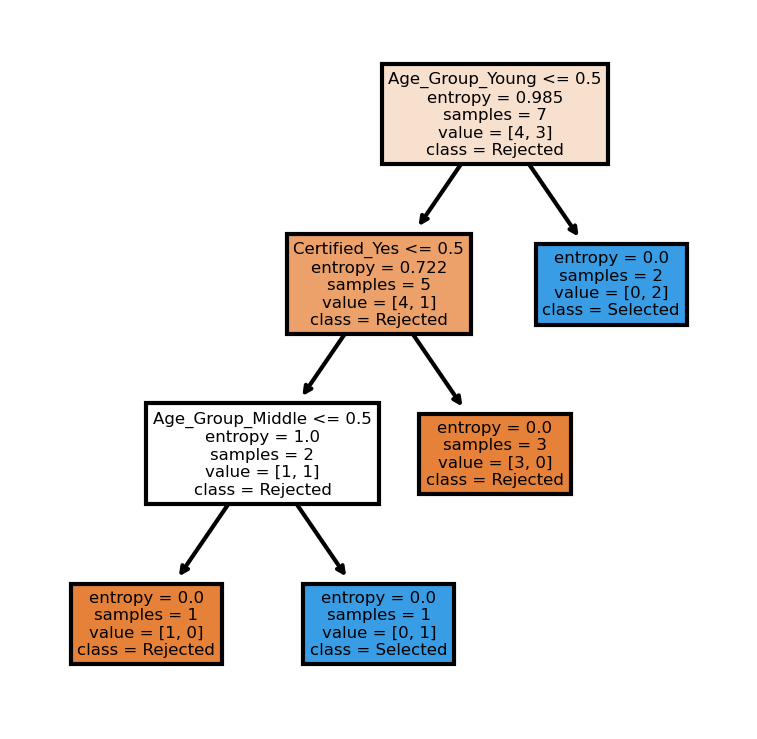

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

**9. Design and visualize the decision tree using scikit-learn package for the Titanic (training) dataset from Kaggle.**

In [69]:
import numpy as np
import pandas as pd
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

In [75]:
train= pd.read_csv("Titanic_Dataset.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
print("Classes to predict: \n",train.head(3))

Classes to predict: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [77]:
full_data = [train]

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [78]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)   

In [79]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']  = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;

In [82]:
y = train['Survived']
X = train.drop(['Survived'], axis=1).values 

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.6, random_state= 2)

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [85]:
#prediction
y_pred = clf.predict(X_test) #Accuracy

from sklearn.metrics import accuracy_score
print('Accuracy on train data :',accuracy_score(y_train,clf.predict(X_train)))
print('Accuracy on test data :',accuracy_score(y_test,y_pred)) 

Accuracy on train data : 0.9297752808988764
Accuracy on test data : 0.8


In [86]:
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=50) #incresing the value of the decision tree smoothens the decision tree and prevents overfitting
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy on train data :',accuracy_score(y_train,clf.predict(X_train)))
print('Accuracy on test data :',accuracy_score(y_test,y_pred))  

Accuracy on train data : 0.8258426966292135
Accuracy on test data : 0.8392523364485981


In [ ]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt
%matplotlib inline
clf = DecisionTreeClassifier(criterion ='entropy',min_samples_split=50).fit(data[feature_cols],data['Purchase Iphone'])
plot_tree(clf, filled =True )
plt.show()

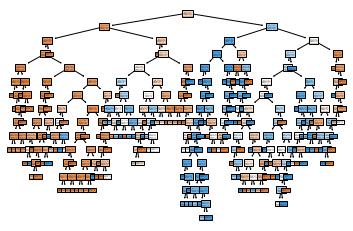

In [92]:
import matplotlib.pyplot as plt
from sklearn import tree
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=2) 
#incresing the value of the decision tree smoothens the decision tree and prevents overfitting
clf.fit(X,y)
dot_data = tree.plot_tree(clf,filled=True)
plt.show() 

**10. Evaluate the designed model on the Titanic dataset itself with various metrics.**

In [89]:
print("Accuracy Score")

from sklearn.neighbors import KNeighborsClassifier
print("Create KNN classifier")
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)
knn.predict(X_test)

#check accuracy of our model on the test data
print("\n KNN Score: ",knn.score(X_test, y_test))

from sklearn.metrics import accuracy_score
print("KNN Accuracy: ",accuracy_score(y_test, y_pred))

#Classification Report
from sklearn.metrics import classification_report
print("\n Classification Report: \n\n",classification_report(y_test, y_pred))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\n Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

#Regression Metrics
print("\n Regression Metrics")

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("\n Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))

#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("\n Mean Squared Error: ",mean_squared_error(y_test, y_pred))

#R² Score
from sklearn.metrics import r2_score
print("\n R² Score: ",r2_score(y_test, y_pred))

#Clustering Metrics
print("\n Clustering Metrics:- ")

#Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
print("\n Adjusted Rand Index: ",adjusted_rand_score(y_test, y_pred))

#Homogeneity
from sklearn.metrics import homogeneity_score
print("\n Homogeneity: ",homogeneity_score(y_test, y_pred))

#V-measure
from sklearn.metrics.cluster import v_measure_score
print("\n V-measure: ",v_measure_score(y_test, y_pred))



Accuracy Score
Create KNN classifier

 KNN Score:  0.8130841121495327
KNN Accuracy:  0.8392523364485981

 Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.90      0.87       330
           1       0.82      0.74      0.78       205

    accuracy                           0.84       535
   macro avg       0.84      0.82      0.83       535
weighted avg       0.84      0.84      0.84       535


 Confusion Matrix: 
 [[297  33]
 [ 53 152]]

 Regression Metrics

 Mean Absolute Error:  0.16074766355140188

 Mean Squared Error:  0.16074766355140188

 R² Score:  0.31988174427198834

 Clustering Metrics:- 

 Adjusted Rand Index:  0.4566769897526626

 Homogeneity:  0.33848027008134673

 V-measure:  0.343851422161813
